In [1]:
import os
import sys
sys.path.append("../monk/");
import psutil
from gluon_prototype import prototype

In [2]:
gtf = prototype(verbose=1);
gtf.Prototype("sample-project", "sample-experiment-1");


gtf.Dataset_Params(dataset_path="../monk/system_check_tests/datasets/dataset_cats_dogs_train", 
                   split=0.9, input_size=224, 
                    batch_size=4, shuffle_data=True, num_processors=3);

# Transform
gtf.apply_random_horizontal_flip(train=True, val=True);
gtf.apply_normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], train=True, val=True, test=True);

# Set Dataset
gtf.Dataset();

Mxnet Version: 1.5.1

Experiment Details
    Project: sample-project
    Experiment: sample-experiment-1
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v4.8_without_multi_label_input_updated_gluon/tutorials/workspace/sample-project/sample-experiment-1/

Dataset Details
    Train path:     ../monk/system_check_tests/datasets/dataset_cats_dogs_train
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   3
    Train-val split:   0.9

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 180
    Num val images:   20
    Num classes:      2



In [3]:
network = [];
network.append(gtf.convolution(output_channels=16));
network.append(gtf.batch_normalization());
network.append(gtf.relu());
network.append(gtf.convolution(output_channels=16));
network.append(gtf.batch_normalization());
network.append(gtf.relu());
network.append(gtf.max_pooling());

/home/abhi/.virtualenvs/finetune_py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/abhi/.virtualenvs/finetune_py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


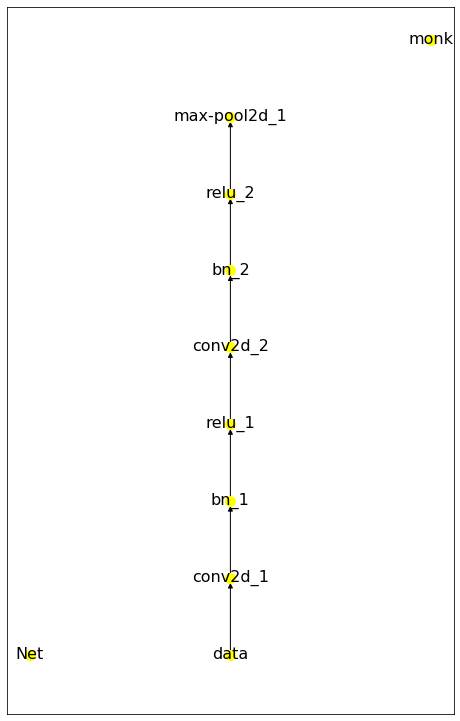

In [4]:
gtf.debug_custom_model_design(network);

In [5]:
subnetwork = [];
branch1 = [];
branch1.append(gtf.convolution(output_channels=16));
branch1.append(gtf.batch_normalization());
branch1.append(gtf.convolution(output_channels=16));
branch1.append(gtf.batch_normalization());

branch2 = [];
branch2.append(gtf.convolution(output_channels=16));
branch2.append(gtf.batch_normalization());

branch3 = [];
branch3.append(gtf.identity())

subnetwork.append(branch1);
subnetwork.append(branch2);
subnetwork.append(branch3);
subnetwork.append(gtf.concatenate());

In [6]:
network.append(subnetwork);

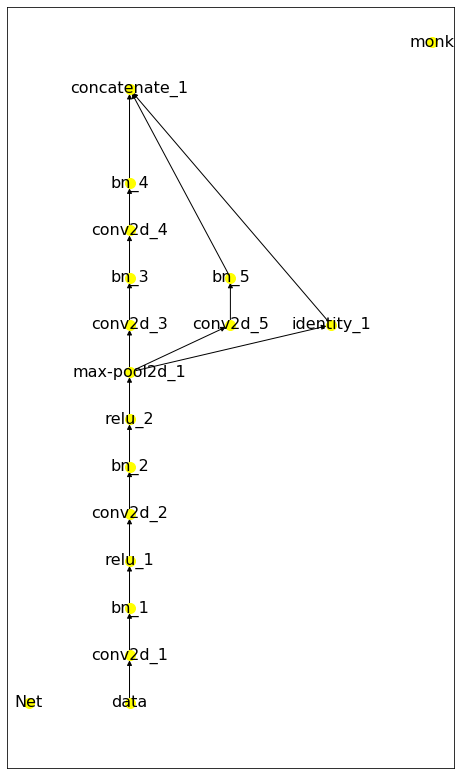

In [7]:
gtf.debug_custom_model_design(network);

In [8]:
network.append(gtf.convolution(output_channels=16));
network.append(gtf.batch_normalization());
network.append(gtf.relu());
network.append(gtf.max_pooling());

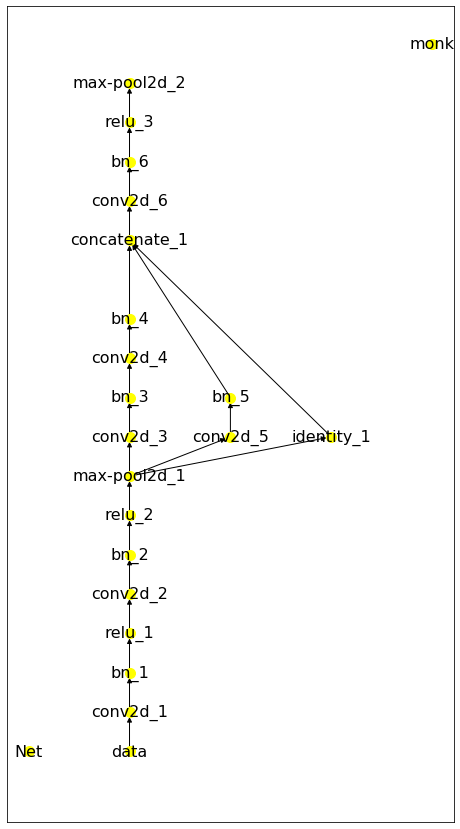

In [9]:
gtf.debug_custom_model_design(network);

In [10]:
subnetwork = [];
branch1 = [];
branch1.append(gtf.convolution(output_channels=16));
branch1.append(gtf.batch_normalization());
branch1.append(gtf.convolution(output_channels=16));
branch1.append(gtf.batch_normalization());

branch2 = [];
branch2.append(gtf.convolution(output_channels=16));
branch2.append(gtf.batch_normalization());

branch3 = [];
branch3.append(gtf.identity())

subnetwork.append(branch1);
subnetwork.append(branch2);
subnetwork.append(branch3);
subnetwork.append(gtf.add());

In [11]:
network.append(subnetwork);

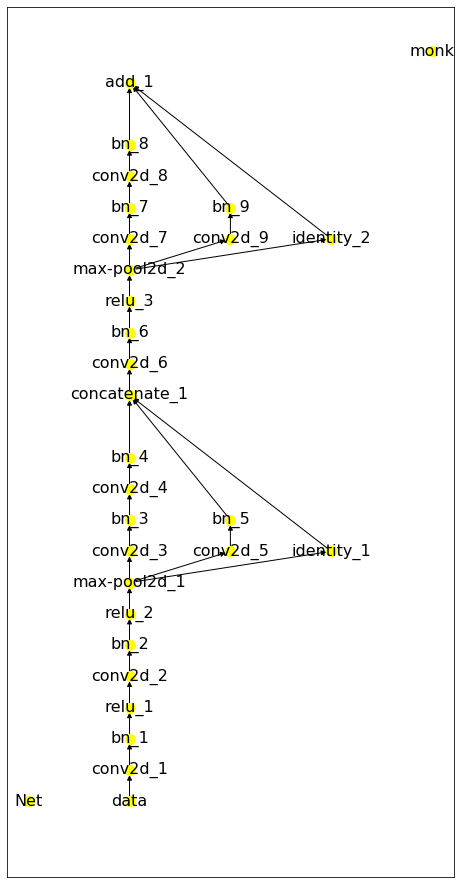

In [12]:
gtf.debug_custom_model_design(network);

In [13]:
network.append(gtf.convolution(output_channels=16));
network.append(gtf.batch_normalization());
network.append(gtf.relu());
network.append(gtf.max_pooling());

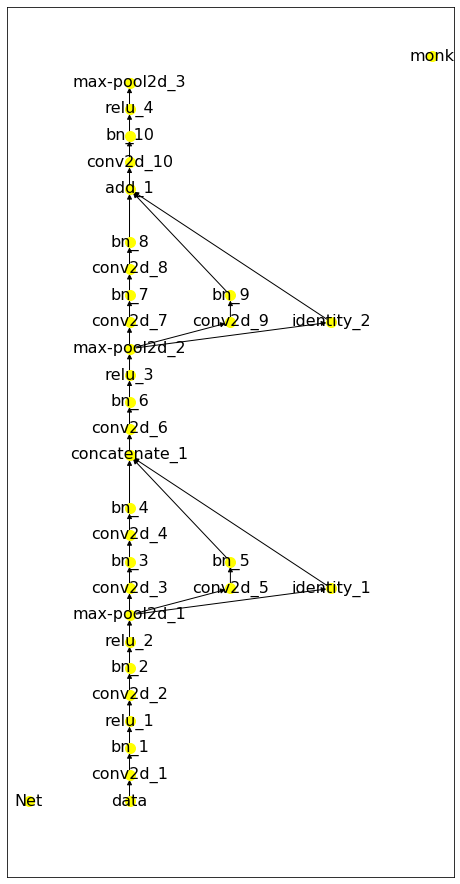

In [15]:
gtf.debug_custom_model_design(network);

In [16]:
network.append(gtf.flatten());
network.append(gtf.fully_connected(units=1024));
network.append(gtf.dropout(drop_probability=0.2));
network.append(gtf.fully_connected(units=2));

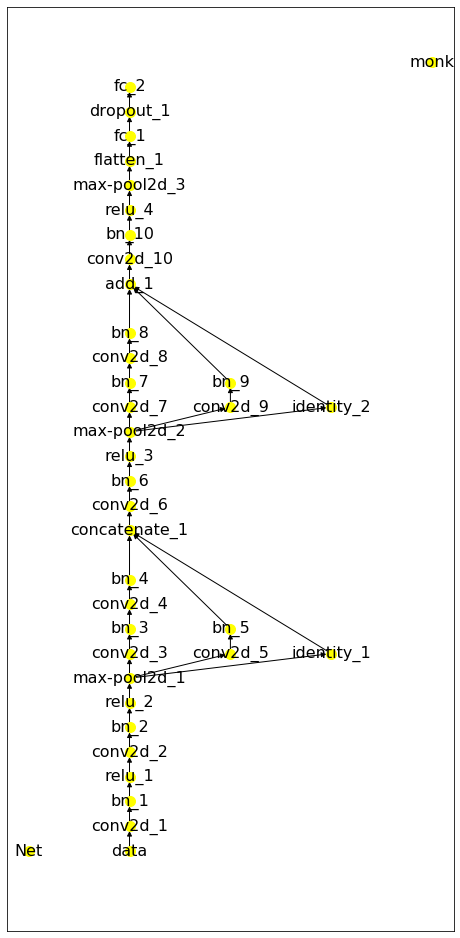

In [17]:
gtf.debug_custom_model_design(network);

Model Details
    Loading pretrained model


/home/abhi/.virtualenvs/finetune_py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/abhi/.virtualenvs/finetune_py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


    Model Loaded on device
        Model name:                           Custom Model
        Num of potentially trainable layers:  22
        Num of actual trainable layers:       22



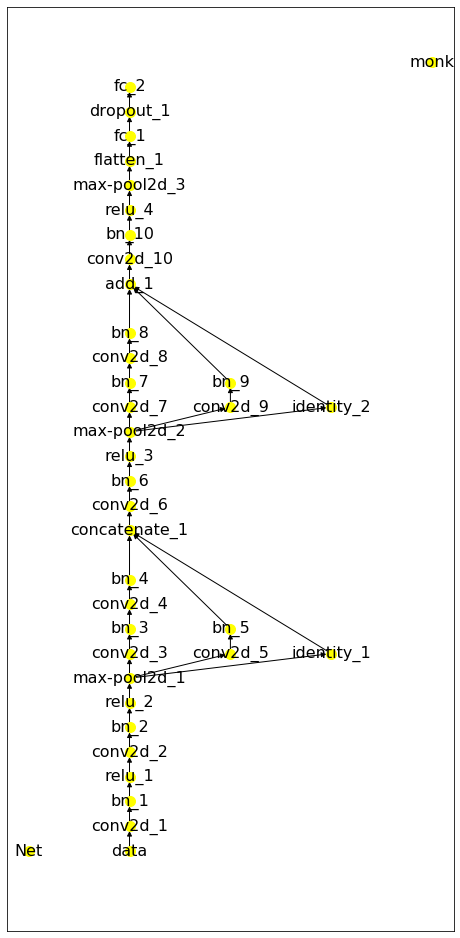

In [18]:
gtf.Compile_Network(network);